###### This is for the second model that we are using which is a feedforward neural network!

##### Here is a link just for you!:
https://www.geeksforgeeks.org/feedforward-neural-network/

In [1]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#import tensorflow as tf
#print(tf.__version__)


In [2]:
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%run PrepTime.ipynb

In [4]:
df = maindf()

C:\Users\igarcialopez\AppData\Local\Temp\ipykernel_22536\839577113.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nutritional.tsv", sep="\t")


In [5]:
df = artificialCalories(df)
df = RecoScore2(df)
df = shouldYou()

In [6]:
# These are columns that have negative sugar!?!
df = df.drop([8642, 119086, 152522, 165746])

In [20]:
df = df.drop(df[df['score'] > 1].index)

In [21]:
df.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,calcium_100g,expected_cal,score,encode
1,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.000,0.000,528.57,0.241779,1
2,Peanuts,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.250,0.071,475.02,0.246888,1
79,Granola Cranberry And Acai,1824.0,10.91,0.91,0.0,0.000,74.55,25.45,5.5,9.09,0.100,0.036,432.75,0.240108,1
82,"Peanuts, Mixed Nuts",2389.0,42.86,7.14,0.0,0.000,25.00,14.29,7.1,25.00,0.214,0.071,585.74,0.346076,1
148,Cranberries,1255.0,0.00,0.00,0.0,0.000,83.33,66.67,10.0,0.00,0.000,0.000,333.32,0.444467,2


In [22]:
#!pip install tensorflow scikit-learn


In [23]:
#!pip install tensorflow


In [24]:
#import tensorflow as ts

In [25]:
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The code below is just so that you can compare and contrast and have a general idea!

In [26]:
X = df[['fat_100g', 'sugars_100g', 'sodium_100g']]
y = df['score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()

model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))  
model.add(Dense(units=32, activation='relu'))  
model.add(Dense(units=1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2)


Epoch 1/250


C:\Users\igarcialopez\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - loss: 0.7416 - mae: 0.1833 - val_loss: 9.6873e-05 - val_mae: 0.0062
Epoch 2/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - loss: 8.4442e-05 - mae: 0.0061 - val_loss: 3.1712e-05 - val_mae: 0.0035
Epoch 3/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - loss: 3.7392e-04 - mae: 0.0093 - val_loss: 0.0036 - val_mae: 0.0376
Epoch 4/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - loss: 8.6167e-04 - mae: 0.0108 - val_loss: 0.0032 - val_mae: 0.0402
Epoch 5/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - loss: 9.0685e-04 - mae: 0.0147 - val_loss: 0.0056 - val_mae: 0.0466
Epoch 6/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - loss: 9.6712e-04 - mae: 0.0129 - val_loss: 2.2242e-05 - val_mae: 0.0030
Epoch 7/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - loss: 5.1326e-04 - mae: 0.0081 - val_loss: 7.2090e-06 - val_mae: 0.0018
Epoch 8/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - loss: 3.2773e-04 - mae: 0.0042 - val_loss: 6.4717e-0

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 1.1052e-06 - mae: 3.5134e-04 - val_loss: 5.5202e-08 - val_mae: 1.4907e-04
Epoch 50/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - loss: 4.0351e-07 - mae: 2.5811e-04 - val_loss: 4.5836e-06 - val_mae: 0.0015
Epoch 51/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - loss: 5.7907e-07 - mae: 3.2202e-04 - val_loss: 1.6181e-08 - val_mae: 1.0549e-04
Epoch 52/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - loss: 5.9956e-07 - mae: 2.8809e-04 - val_loss: 7.6204e-09 - val_mae: 6.0659e-05
Epoch 53/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - loss: 1.8391e-06 - mae: 4.5214e-04 - val_loss: 7.5019e-06 - val_mae: 0.0020
Epoch 54/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - loss: 1.1641e-06 - mae: 5.4478e-04 - val_loss: 2.9544e-08 - val_mae: 9.9480e-05
Epoch 55/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - loss: 9.2271e-07 - mae: 4.2469e-04 - val_loss: 3.8594e-07 - val_mae: 5.3139e-04
Epoch 56/250
2222/2222 ━━━━━━━━━━━━━━━━━━

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - loss: 5.5881e-07 - mae: 3.0136e-04 - val_loss: 3.6315e-06 - val_mae: 0.0013
Epoch 97/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - loss: 6.4096e-07 - mae: 2.5387e-04 - val_loss: 2.1733e-09 - val_mae: 1.9709e-05
Epoch 98/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - loss: 2.1375e-07 - mae: 1.2776e-04 - val_loss: 1.2042e-08 - val_mae: 7.0452e-05
Epoch 99/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - loss: 7.6258e-07 - mae: 3.3411e-04 - val_loss: 8.3030e-10 - val_mae: 1.1740e-05
Epoch 100/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - loss: 2.4186e-07 - mae: 1.4241e-04 - val_loss: 1.0093e-09 - val_mae: 1.2876e-05
Epoch 101/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - loss: 1.9037e-07 - mae: 1.6641e-04 - val_loss: 1.8865e-09 - val_mae: 3.2898e-05
Epoch 102/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 1.6437e-07 - mae: 8.3188e-05 - val_loss: 6.4900e-10 - val_mae: 9.7164e-06
Epoch 103/250
2222/2222 ━━━━━━━━━━

Epoch 143/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - loss: 1.8028e-07 - mae: 1.5675e-04 - val_loss: 1.8733e-09 - val_mae: 3.2415e-05
Epoch 144/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - loss: 1.8654e-07 - mae: 1.3050e-04 - val_loss: 2.1905e-08 - val_mae: 1.2430e-04
Epoch 145/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - loss: 2.1221e-07 - mae: 1.9442e-04 - val_loss: 6.5130e-10 - val_mae: 1.2015e-05
Epoch 146/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - loss: 2.8078e-07 - mae: 1.6126e-04 - val_loss: 1.6379e-09 - val_mae: 2.5018e-05
Epoch 147/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - loss: 8.4127e-07 - mae: 3.0013e-04 - val_loss: 7.4518e-08 - val_mae: 1.9087e-04
Epoch 148/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - loss: 4.7189e-07 - mae: 3.3555e-04 - val_loss: 6.0105e-09 - val_mae: 7.2249e-05
Epoch 149/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - loss: 2.3290e-07 - mae: 2.2474e-04 - val_loss: 1.6554e-09 - val_mae: 2.9907e-05
Epoch 150/250

Epoch 190/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - loss: 3.6118e-07 - mae: 1.6557e-04 - val_loss: 7.8739e-09 - val_mae: 7.0894e-05
Epoch 191/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.4211e-07 - mae: 2.5203e-04 - val_loss: 1.6193e-08 - val_mae: 7.4721e-05
Epoch 192/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - loss: 1.2888e-07 - mae: 1.6457e-04 - val_loss: 1.8347e-08 - val_mae: 9.5895e-05
Epoch 193/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - loss: 1.3166e-07 - mae: 1.5306e-04 - val_loss: 1.6690e-09 - val_mae: 2.0376e-05
Epoch 194/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - loss: 2.9495e-07 - mae: 1.3827e-04 - val_loss: 4.3451e-09 - val_mae: 5.9148e-05
Epoch 195/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - loss: 2.9977e-07 - mae: 2.2138e-04 - val_loss: 4.1114e-07 - val_mae: 4.9745e-04
Epoch 196/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - loss: 3.0674e-07 - mae: 2.7502e-04 - val_loss: 1.1698e-07 - val_mae: 2.7054e-04
Epoch 197/250
2

Epoch 237/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - loss: 1.5223e-07 - mae: 2.1271e-04 - val_loss: 1.4653e-07 - val_mae: 2.5998e-04
Epoch 238/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 1.4340e-07 - mae: 1.6996e-04 - val_loss: 2.6878e-08 - val_mae: 1.2637e-04
Epoch 239/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - loss: 1.3870e-07 - mae: 1.5557e-04 - val_loss: 3.9697e-08 - val_mae: 1.4935e-04
Epoch 240/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - loss: 1.2308e-07 - mae: 1.4252e-04 - val_loss: 5.9187e-10 - val_mae: 1.8936e-05
Epoch 241/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - loss: 1.0438e-07 - mae: 7.8029e-05 - val_loss: 2.3871e-06 - val_mae: 0.0012
Epoch 242/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - loss: 7.5522e-07 - mae: 3.0631e-04 - val_loss: 4.4769e-10 - val_mae: 8.2505e-06
Epoch 243/250
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - loss: 6.2881e-08 - mae: 6.2866e-05 - val_loss: 6.9916e-08 - val_mae: 1.6697e-04
Epoch 244/250
222

In [28]:
predictions = model.predict(X_test)


1191/1191 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


In [29]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

1191/1191 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: 4.6655e-10 - mae: 1.4553e-05
Test Loss: 4.805311148992075e-10
Test MAE: 1.4653452126367483e-05


In [30]:
predictions = model.predict(X_test)


1191/1191 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


In [31]:
y_pred = predictions.flatten()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = predictions.flatten()  # reshape if needed
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.4653584203153091e-05
MSE: 4.805421593014595e-10
R2 Score: 0.9999999818375697


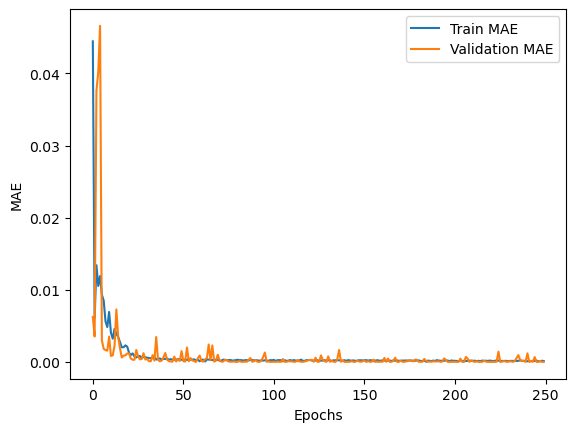

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [28]:
predictions

array([[0.15951174],
       [0.07944144],
       [0.27205357],
       ...,
       [0.11158328],
       [0.11807864],
       [0.42625752]], dtype=float32)

In [33]:
X_test

,fat_100g,sugars_100g,sodium_100g
144132,0.00,0.00,0.368
71474,21.43,10.71,0.393
18362,0.83,3.33,0.633
152796,22.62,1.19,0.631
111845,0.00,44.44,0.000
...,...,...,...
135845,21.74,41.30,0.217
128833,6.18,19.66,0.522
129071,12.86,25.71,0.114
299376,6.23,1.63,0.352


In [43]:
def categorize_score(score):
    if score <= 0.35:
        return "All good!"
    elif 0.35 < score < 0.7:
        return "Moderate"
    else:
        return "Please do not eat this, it's for your own good!"

In [47]:
def get_user_input():
    fat_100g = float(input("Enter Fat (100g): "))
    sugars_100g = float(input("Enter Sugars (100g): "))
    sodium_100g = float(input("Enter Sodium (100g): "))
    #expected_cal = float(input("Enter Expected Calories: "))

    
    new_food = pd.DataFrame({
        
        'fat_100g': [fat_100g],
        'sugars_100g': [sugars_100g],
        'sodium_100g': [sodium_100g],
        #'expected_cal': [expected_cal]
    })

    return new_food

new_food = get_user_input()
predicted_score = model.predict(new_food)[0]
category = categorize_score(predicted_score)

print(f"\nPredicted Score: {predicted_score}")
print(f"Category: {category}")

Enter Fat (100g): 20
Enter Sugars (100g): 1
Enter Sodium (100g): 0.53
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Predicted Score: [0.1860445]
Category: All good!


In [37]:
#hershey's bar : 88g, 165g. 0.2g     score: 0.7948717948717948 #These scores are from another model
#hershey's bar : 8g, 15g, 0.02       score: 0.1400076923076923
#Buldak soup: 21g, 9g, 1.19g         score: 0.3209438127090301
#Pep pizza 1s: 16g, 0, 0.56g         score: 0.16288740245261987
#Pep pizza 4s: 64g, 0, 2.24g         score: 0.6636365663322186
#Pep pizza 6s: 96g, 0, 3.36g         score: 0.7160479375696768
#Spaghettios 1s: 7g, 8g,  0.57g      score: 0.1653098104793757
#Spaghettios all: 17g, 20g, 1.42g    score: 0.4246150501672241
#Meatballs 6piece: 20g, 1g, 0.53g    score: 0.1798104793756968
#THIS^ but 3 serving: 60g, 3g, 1.59g score: 0.5345838350055742